In [86]:
import numpy as np
import matplotlib.pyplot as plt
import os

from reservoirpy.datasets import mackey_glass, lorenz96, henon_map
from utils.dataGenerator import powerlawNoiseGenerator
from utils.dataPlots import plot_timeseries, plot_attractor

from core.models import EchoStateNetwork, SingleNodeDelayESN, TwoNodeDelayESN
from core.pipelines import StandardPipeline, DelayPipeline

from utils.plotting import predictionAnalysis, predictionAnalysisNDim, internalStatesHistogram
from utils.exporting import export_results

In [87]:
timeseries = mackey_glass(15000)
timeseries.shape

(15000, 1)

/Users/sashvqz/Downloads/TFGs/utils/dataPlots.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


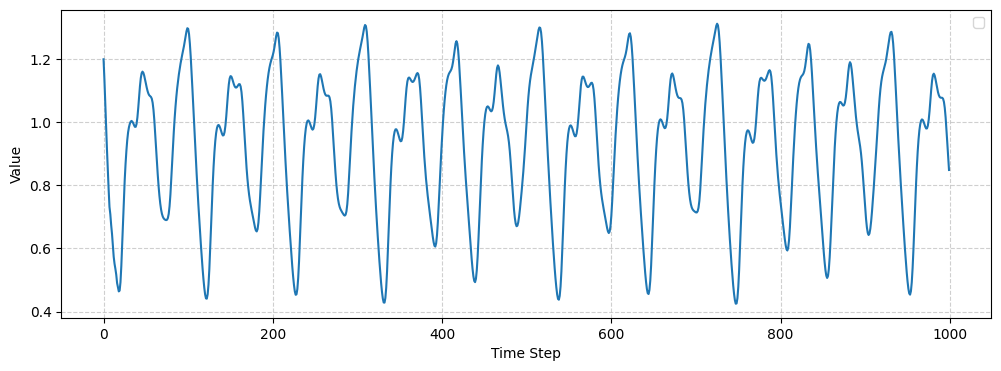

In [88]:
plot_timeseries(timeseries)

In [89]:
params = {
    'inputSize': 1,
    'reservoirSize': 347,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.25,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [90]:
model = EchoStateNetwork(**params)

In [91]:
pipeline = StandardPipeline(esn_model=model)

In [92]:
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [93]:
metrics

{'mse': 3.843919517429619e-05,
 'rmse': np.float64(0.006199935094361568),
 'mae': 0.0026766365845615784,
 'nrmse': np.float64(0.006889922367869546)}

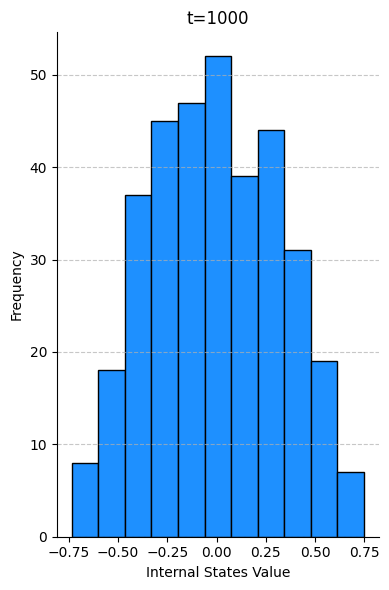

In [94]:
internalStatesHistogram(
    states=internal_states,
    time_step_index=1000,
    reservoir_size=params['reservoirSize'],
)

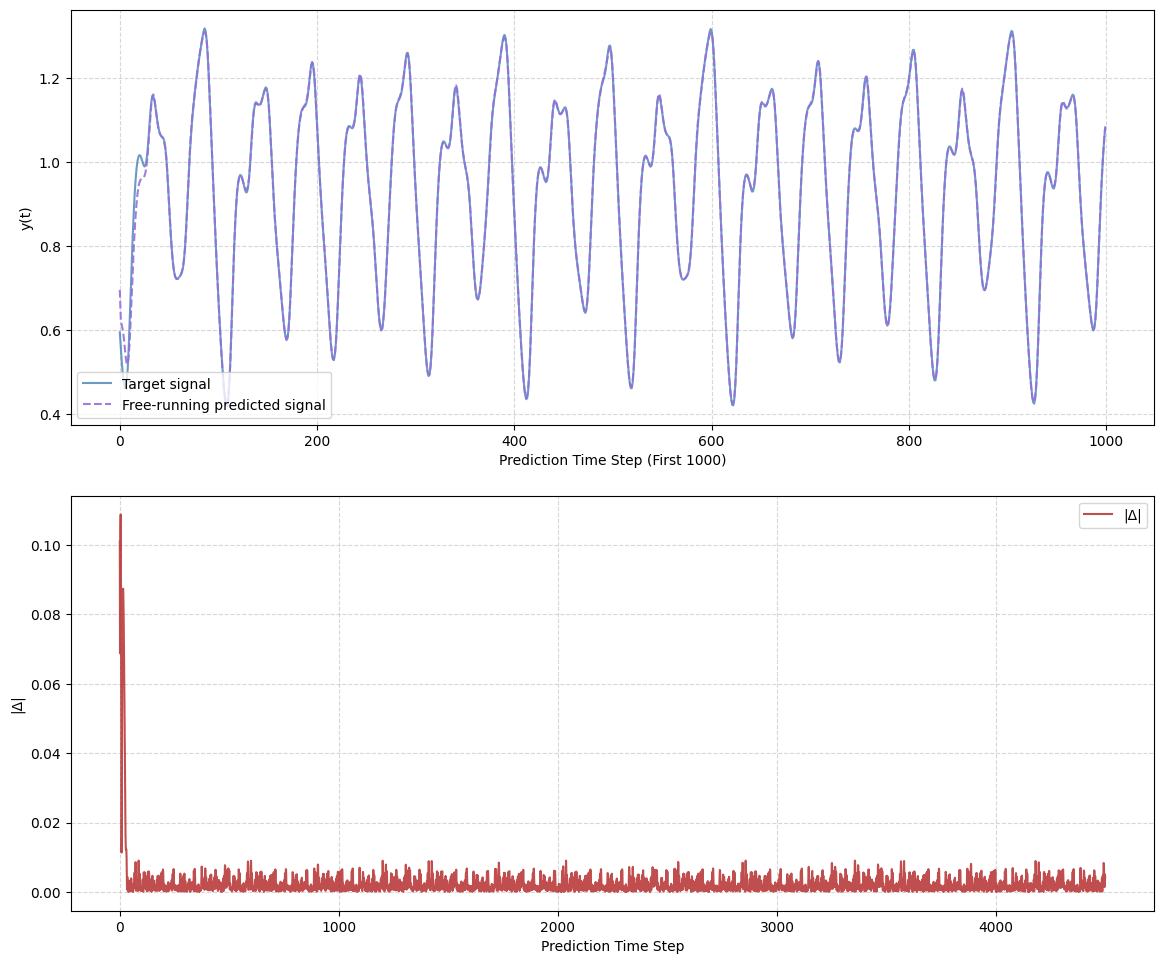

In [95]:
predictionAnalysis(predictions, actuals, zoom_limit=1000)

In [96]:
henonSeries = henon_map(n_timesteps=15000)
henonSeries.shape

(15000, 2)

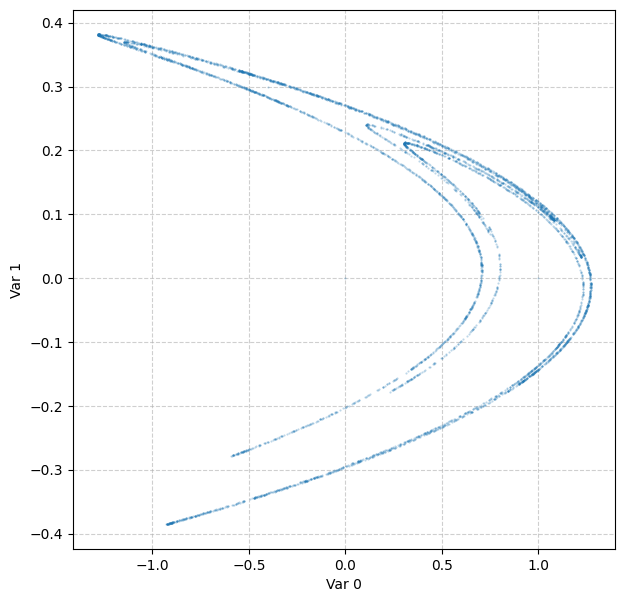

In [97]:
plot_attractor(henonSeries)

In [98]:
paramsHenon = {
    'inputSize': 2,
    'reservoirSize': 800,
    'outputSize': 2,
    'spectralRadius': 0.9,
    'ridgeParam': 1e-8,
    'leakingRate': 0.2,
    'randomSeed': 42
}

In [99]:
modelHenon = EchoStateNetwork(**paramsHenon)

In [100]:
pipelineHenon = StandardPipeline(esn_model=modelHenon)

In [101]:
predictionsHenon, actualsHenon, metricsHenon, internal_statesHenon = pipelineHenon.run(
    henonSeries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [102]:
metricsHenon

{'mse': 0.0011801120327720712,
 'rmse': np.float64(0.03435275873597448),
 'mae': 0.0020595602334646658,
 'nrmse': np.float64(0.02066784512835925)}

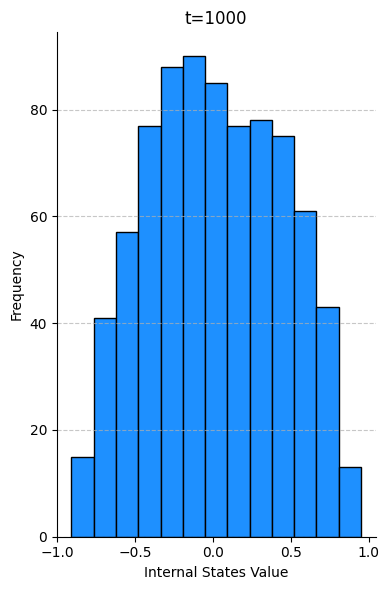

In [103]:
internalStatesHistogram(
    states=internal_statesHenon,
    time_step_index=1000,
    reservoir_size=paramsHenon['reservoirSize'],
)

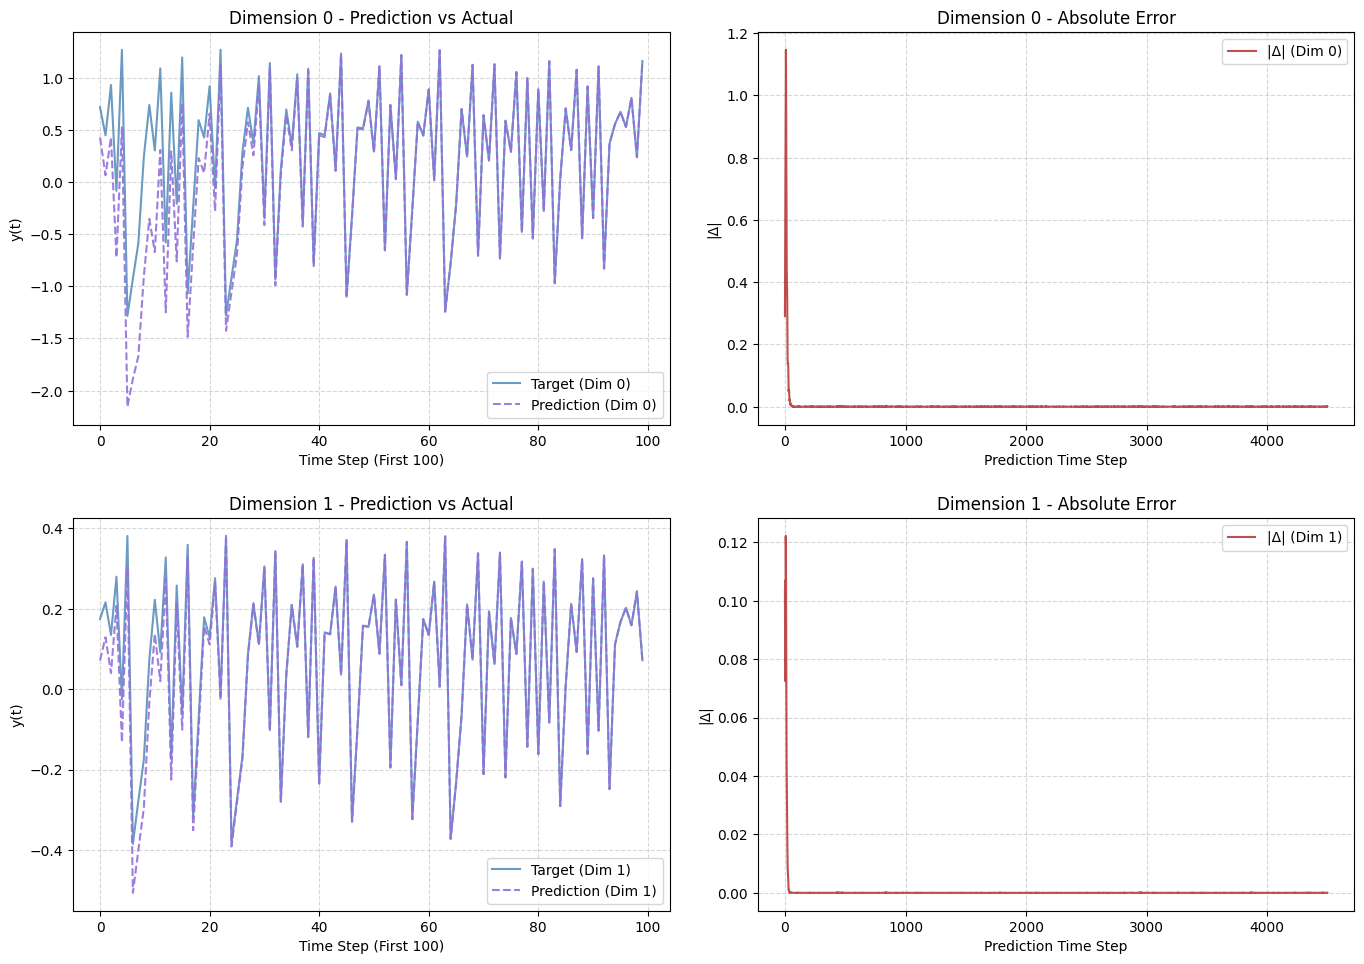

In [104]:
predictionAnalysisNDim(predictionsHenon, actualsHenon, zoom_limit=100)

In [105]:
N_STEPS = 15000
BETA = 0.9
SEED = 42

In [106]:
timeseriesBBHSim = powerlawNoiseGenerator(N_STEPS, BETA, randomSeed=SEED)
timeseriesBBHSim = timeseriesBBHSim.reshape(-1, 1)
timeseriesBBHSim.shape

(15000, 1)

/Users/sashvqz/Downloads/TFGs/utils/dataPlots.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


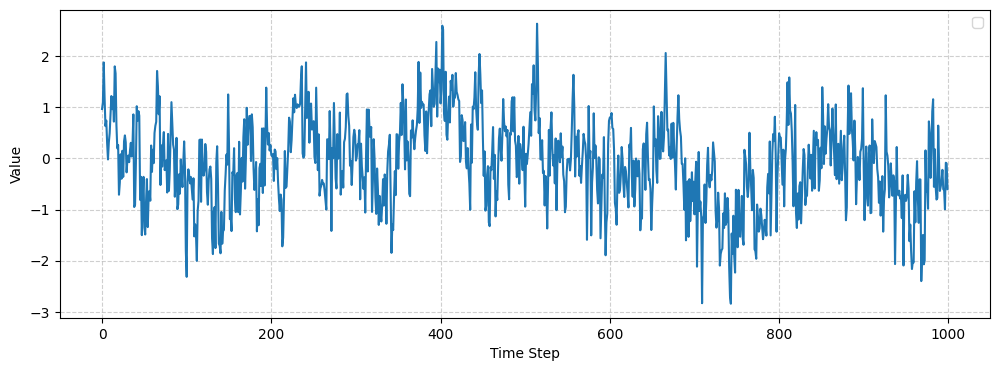

In [107]:
plot_timeseries(timeseriesBBHSim)

In [108]:
paramsBHH = {
    'inputSize': 1,
    'reservoirSize': 3470,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.25,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [109]:
modelBBH = EchoStateNetwork(**paramsBBH)

In [110]:
pipelineBBH = StandardPipeline(esn_model=modelBBH)

In [111]:
predictionsBBH, actualsBBH, metricsBBH, internal_statesBBH = pipelineBBH.run(
    timeseriesBBHSim,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [112]:
metricsBBH

{'mse': 0.3982596231204803,
 'rmse': np.float64(0.6310781434342979),
 'mae': 0.5018288280614048,
 'nrmse': np.float64(0.09311686507470539)}

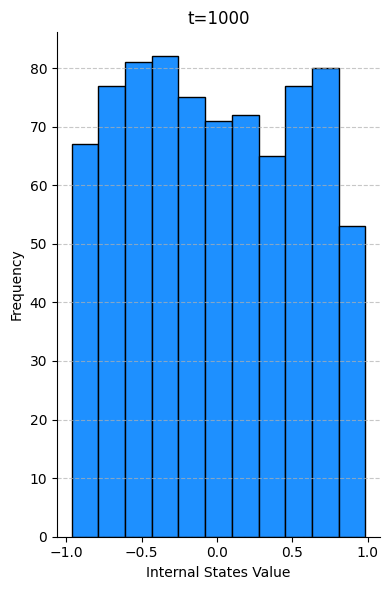

In [116]:
internalStatesHistogram(
    states=internal_statesBBH,
    time_step_index=1000,
    reservoir_size=paramsBBH['reservoirSize'],
)

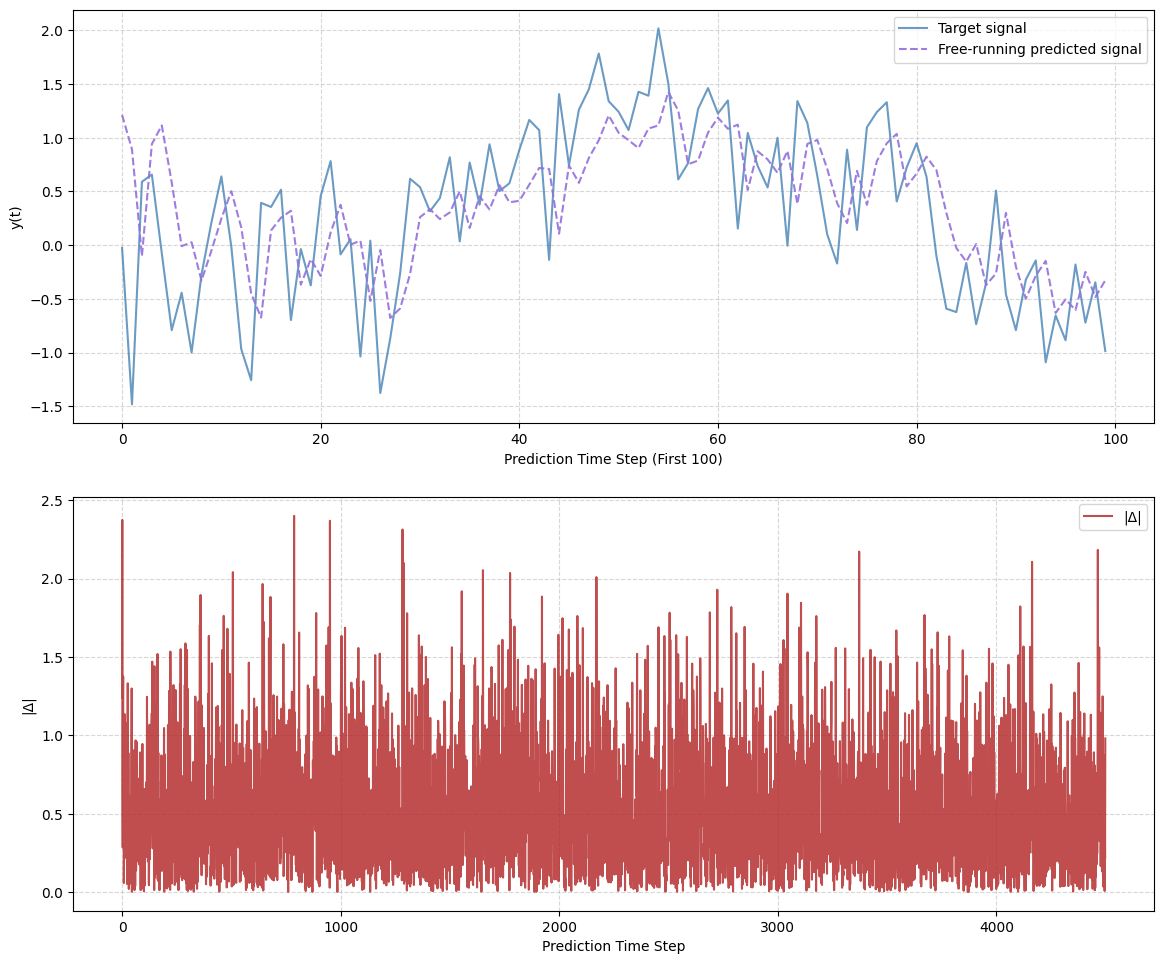

In [114]:
predictionAnalysis(predictionsBBH, actualsBBH, zoom_limit=100)